In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Problema 1: Desarrolle una funci´ on la cual reciba dos par´ ametros, una imagen y un entero llamado color, la funci´ on debe devolver una imagen la cual tenga activos los canales de color seg´ un los siguientes puntos

In [4]:
img = cv2.imread("Atitlan.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

Se muestra la imagen

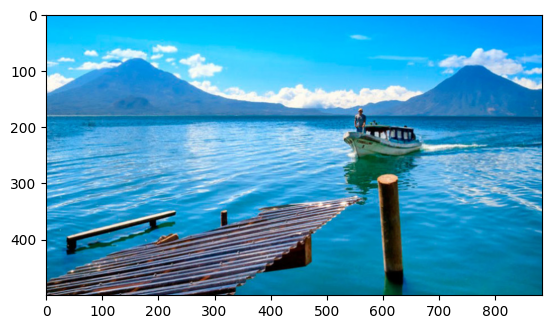

In [5]:
plt.imshow(img)
plt.show()

In [6]:
def activar_canales_de_color(img, color):
    try:
        alto, ancho, _ = img.shape
        monocromo = np.zeros((alto, ancho, 3))


        for i in range(0, alto):
            for j in range(0, ancho):
                pixel = img[i, j]
                # Extraer canales de color
                blue = pixel[2]
                green = pixel[1]
                red = pixel[0]

                if color == 1:
                    monocromo[i, j] = [0, 0, blue]  # azul
                elif color == 2:
                    monocromo[i, j] = [0, green, 0]  # verde
                elif color == 3:
                    monocromo[i, j] = [red, 0, 0]  # rojo
                elif color == 10:
                    monocromo[i, j] = [red, green, 0]  # rojo y verde
                elif color == 20:
                    monocromo[i, j] = [0, green, blue]  # verde y azul
                elif color == 30:
                    monocromo[i, j] = [red, 0, blue]  # rojo y azul

        monocromo_rgb = cv2.cvtColor(monocromo.astype(np.uint8), cv2.COLOR_BGR2RGB)

        plt.imshow(monocromo_rgb)
        plt.show()

        cv2.imwrite("monocromo_resultante.jpg", monocromo)

    except Exception as e:
        print("Error:", e)

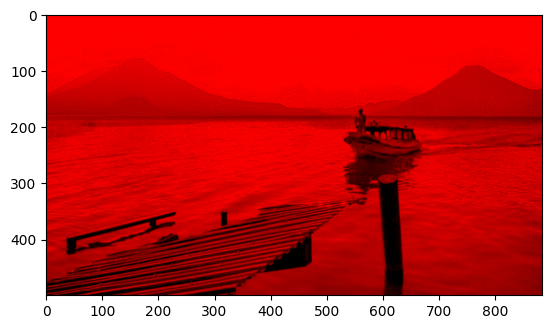

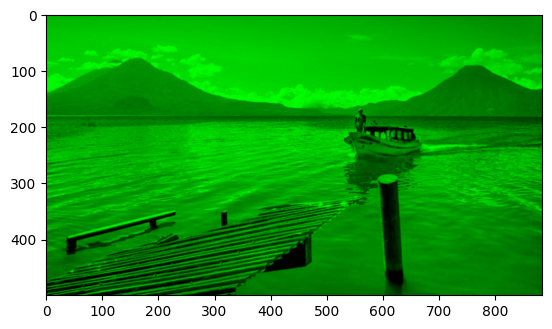

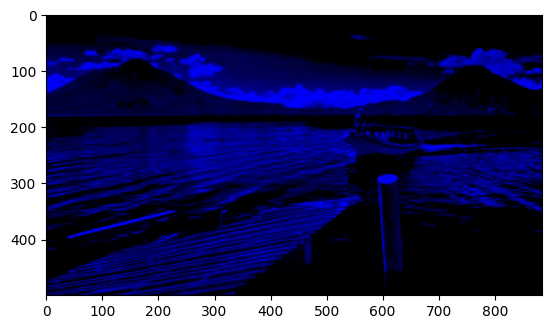

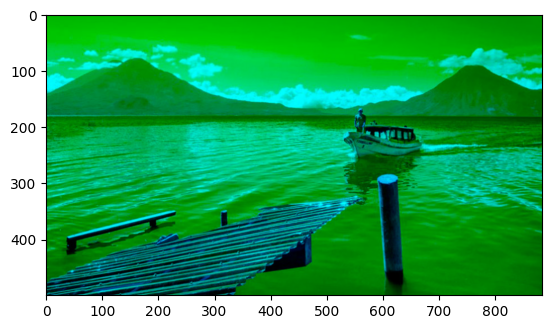

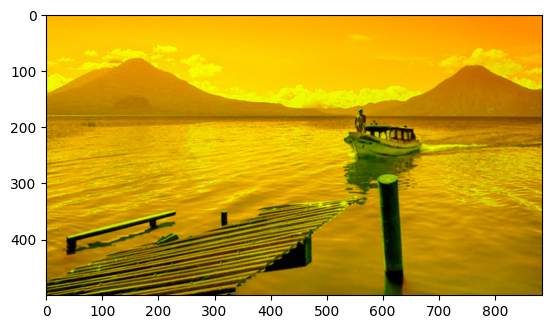

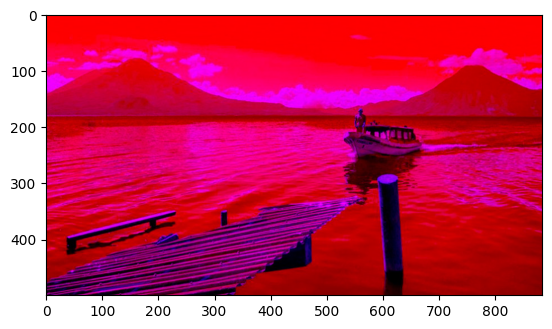

In [7]:
imagen = cv2.imread('Atitlan.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

valores_color = [1, 2, 3, 10, 20, 30]

for color in valores_color:
    activar_canales_de_color(imagen, color)

Problema 2: En el .zip del laboratorio se le comparti´ o un conjunto de im´ agenes en escala de grises, estas im´ agenes fueron creadas utilizando una escala de grises en 3D, cree una funci´ on que dadas las 3 im´ agenes se construya la imagen original a color.


In [8]:
def construir_imagen_color(img_gray_rojo, img_gray_verde, img_gray_azul):
    try:
        # Leer las imágenes en escala de grises utilizando OpenCV
        gray_rojo = cv2.imread(img_gray_rojo, cv2.IMREAD_GRAYSCALE)
        gray_verde = cv2.imread(img_gray_verde, cv2.IMREAD_GRAYSCALE)
        gray_azul = cv2.imread(img_gray_azul, cv2.IMREAD_GRAYSCALE)
        imagen_color = cv2.merge((gray_rojo, gray_verde, gray_azul))
        plt.imshow(imagen_color)
        plt.axis('off')
        plt.show()
        cv2.imwrite("imagen_original_color.jpg", imagen_color)

    except Exception as e:
        print("Error:", e)

In [15]:
#Imagen1
imagen1_salida_gray_azul = "imagen1_salida_gray_azul.jpg"
imagen1_salida_gray_rojo = "imagen1_salida_gray_rojo.jpg"
imagen1_salida_gray_verde = "imagen1_salida_gray_verde.jpg"

construir_imagen_color(imagen1_salida_gray_rojo, imagen1_salida_gray_verde, imagen1_salida_gray_azul)

In [22]:
#Imagen2
imagen2_salida_gray_azul = "imagen2_salida_gray_azul.jpg"
imagen2_salida_gray_rojo = "imagen2_salida_gray_rojo.jpg"
imagen2_salida_gray_verde = "imagen2_salida_gray_verde.jpg"

construir_imagen_color(imagen2_salida_gray_rojo, imagen2_salida_gray_verde, imagen2_salida_gray_azul)


In [ ]:
#Imagen3
perro_salida_gray_azul = "perro_salida_gray_azul.jpg"
perro_salida_gray_rojo = "perro_salida_gray_rojo.jpg"
perro_salida_gray_verde = "perro_salida_gray_verde.jpg"

construir_imagen_color(perro_salida_gray_rojo, perro_salida_gray_verde, perro_salida_gray_azul)

Problema 3: Cree una funci´ on que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funci´ on debe crear 3 im´ agenes como salida. Para entregar este ejercicio debe incluir una las im´ agenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.


In [24]:
def crear_escala_de_grises_3d(imagen_path):
    try:
        img_color = cv2.imread(imagen_path)

        canal_rojo = img_color[:, :, 2]  # Red channel
        canal_verde = img_color[:, :, 1]  # Green channel
        canal_azul = img_color[:, :, 0]  # Blue channel
        gray_rojo = cv2.merge((canal_rojo, canal_rojo, canal_rojo))
        gray_verde = cv2.merge((canal_verde, canal_verde, canal_verde))
        gray_azul = cv2.merge((canal_azul, canal_azul, canal_azul))

        # Mostrar las imágenes resultantes
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(cv2.cvtColor(gray_rojo, cv2.COLOR_BGR2RGB))
        axs[0].axis('off')
        axs[0].set_title('Escala de Grises Rojo')

        axs[1].imshow(cv2.cvtColor(gray_verde, cv2.COLOR_BGR2RGB))
        axs[1].axis('off')
        axs[1].set_title('Escala de Grises Verde')

        axs[2].imshow(cv2.cvtColor(gray_azul, cv2.COLOR_BGR2RGB))
        axs[2].axis('off')
        axs[2].set_title('Escala de Grises Azul')

        plt.show()

        cv2.imwrite("escala_de_grises_rojo.jpg", gray_rojo)
        cv2.imwrite("escala_de_grises_verde.jpg", gray_verde)
        cv2.imwrite("escala_de_grises_azul.jpg", gray_azul)

    except Exception as e:
        print("Error:", e)

imagen_path = "Atitlan.jpg"
crear_escala_de_grises_3d(imagen_path)

Error: name 'cv2' is not defined


Problema 4: Cree una funci´ on que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritm´ etico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una l´ ınea vertical la cual muestre el valor de la media de la distribuci´ on.


<ipython-input-28-2ecf95b64924>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  gris = (rojo + verde + azul) // 3


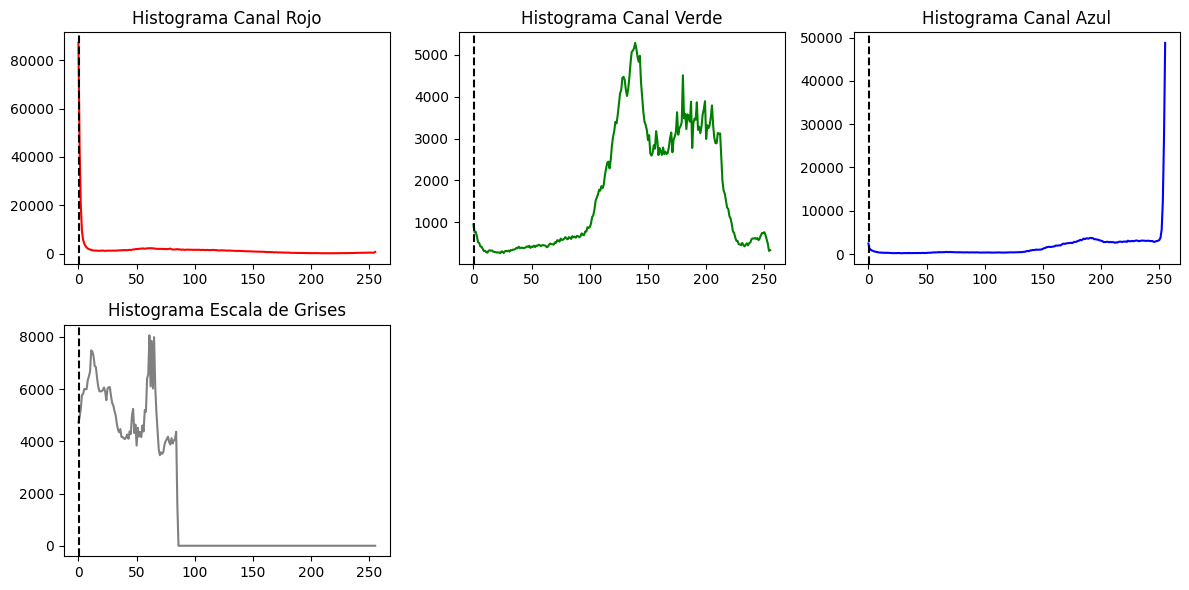

In [28]:
def calcular_histograma(imagen):
    # se crean los histrogramas
    hist_rojo = np.zeros(256)
    hist_verde = np.zeros(256)
    hist_azul = np.zeros(256)
    hist_grises = np.zeros(256)

    # se calculan los histogramas.
    for i in range(imagen.shape[0]):
        for j in range(imagen.shape[1]):
            pixel = imagen[i, j]
            rojo = pixel[0]
            verde = pixel[1]
            azul = pixel[2]
            gris = (rojo + verde + azul) // 3

            hist_rojo[rojo] += 1
            hist_verde[verde] += 1
            hist_azul[azul] += 1
            hist_grises[gris] += 1

    # se calcula media de cada distribución
    media_rojo = np.mean(np.arange(256) * hist_rojo) / np.sum(hist_rojo)
    media_verde = np.mean(np.arange(256) * hist_verde) / np.sum(hist_verde)
    media_azul = np.mean(np.arange(256) * hist_azul) / np.sum(hist_azul)
    media_grises = np.mean(np.arange(256) * hist_grises) / np.sum(hist_grises)

    #se grafica
    plt.figure(figsize=(12, 6))

    plt.subplot(231)
    plt.plot(hist_rojo, color='red')
    plt.axvline(x=media_rojo, color='black', linestyle='dashed')
    plt.title('Histograma Canal Rojo')

    plt.subplot(232)
    plt.plot(hist_verde, color='green')
    plt.axvline(x=media_verde, color='black', linestyle='dashed')
    plt.title('Histograma Canal Verde')

    plt.subplot(233)
    plt.plot(hist_azul, color='blue')
    plt.axvline(x=media_azul, color='black', linestyle='dashed')
    plt.title('Histograma Canal Azul')

    plt.subplot(234)
    plt.plot(hist_grises, color='gray')
    plt.axvline(x=media_grises, color='black', linestyle='dashed')
    plt.title('Histograma Escala de Grises')

    plt.tight_layout()
    plt.show()

# se cargamos la imagen.
imagen_color = plt.imread("Atitlan.jpg")

# se imprimen los resultados.
calcular_histograma(imagen_color)